In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import json

In [2]:
'''At this point, job_growth data is insubstantial and not stretching over our corpus of data.  All areas that will need to be modified
when this changes are indicated with a #TODO_JG comment.'''

'At this point, job_growth data is insubstantial and not stretching over our corpus of data.  All areas that will need to be modified\nwhen this changes are indicated with a #TODO_JG comment.'

In [3]:
#data_source = '../Money-Mavericks/data/data.csv'
data_source = './data/data.csv'
df = pd.read_csv(data_source)
print(df.head())

        State  Education Budget  Unemployment Rate  Population Estimate  \
0     Alabama      5.577678e+08                4.6              4447207   
1      Alaska      1.778816e+08                6.6               626933   
2     Arizona      6.679765e+08                3.9              5130247   
3    Arkansas      3.284035e+08                4.4              2673293   
4  California      3.792097e+09                4.9             33871653   

   SNAPS household_participants  SNAPS individual_participants    SNAPS cost  \
0                   156104.5833                   3.960572e+05  3.437353e+08   
1                    13208.3333                   3.752433e+04  4.583456e+07   
2                    95567.5000                   2.590026e+05  2.402456e+08   
3                    98764.3333                   2.465715e+05  2.062364e+08   
4                   672007.0000                   1.830677e+06  1.639333e+09   

   SNAPS cost_per_person  SNAPS cost_per_household  Median Income  U

In [4]:
'''Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array
Each nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.
Should this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER
comment for easy lookup.'''

'Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array\nEach nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.\nShould this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER\ncomment for easy lookup.'

In [6]:
#TODO_CLUSTER
cluster_source = './data/clustered_states.json'
with open(cluster_source, 'r') as fp:
    data = json.load(fp)

clusters = []

for key, value in data.items():
    if(len(value) > 1):
        clusters.append(value)

print(clusters)

[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia'], ['Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Maryland', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wisconsin', 'Wyoming']]


In [7]:
#Now for each cluster we create a separate x and y

In [14]:
df_by_cluster = []
for cluster in clusters:
    c_df = df.loc[df['State'].isin(cluster), :].copy()
    c_df = c_df.sample(frac=1).reset_index().drop(columns='index').dropna()
    x = c_df[["State", "Education Budget", "Unemployment Rate", "Population Estimate", "Year", "GDP", "# of Jobs (In Thousands)"]] #TODO_JG
    x = pd.get_dummies(data=x, drop_first=True)
    y = c_df["SNAPS cost"]
    df_by_cluster.append([x,y])

In [15]:
#Now that that's created, we're going to loop over each cluster and individually create a linear regression model for them.  

In [16]:
print(df_by_cluster[1])

[     Education Budget  Unemployment Rate  Population Estimate  Year  \
0        3.489580e+08                3.6               621215  2006   
1        1.673335e+09                8.4              3594547  2012   
2        2.322627e+09                4.0              5119598  2006   
3        1.500114e+08                4.9              1293957  2000   
5        3.968124e+09                4.7              5961088  2010   
..                ...                ...                  ...   ...   
478      2.863431e+09                3.3              5691287  2018   
479      2.983605e+08                4.6               903773  2001   
480      9.244349e+08                5.3              1326622  2013   
481      3.902953e+08                4.5               964706  2008   
482      2.461501e+08                4.6               582122  2013   

              GDP  # of Jobs (In Thousands)  State_Connecticut  \
0    2.713000e+10                     307.7                  0   
1    2.409100e

In [17]:
#setting up globals
cluster_models = []
cluster_parameters = [] #expecting [x_train, x_test, y_train, y_test]
cluster_predictions = []
cluster_ls = []

In [18]:
'''Now it's just linear regression, straight up and down.'''

"Now it's just linear regression, straight up and down."

CLUSTER 1 --------------------------------------------
Contains: 
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia']
                            OLS Regression Results                            
Dep. Variable:             SNAPS cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.24e-243
Time:                        12:06:42   Log-Likelihood:                -9529.0
No. Observations:                 452   AIC:                         1.912e+04
Df Residuals:                     420   

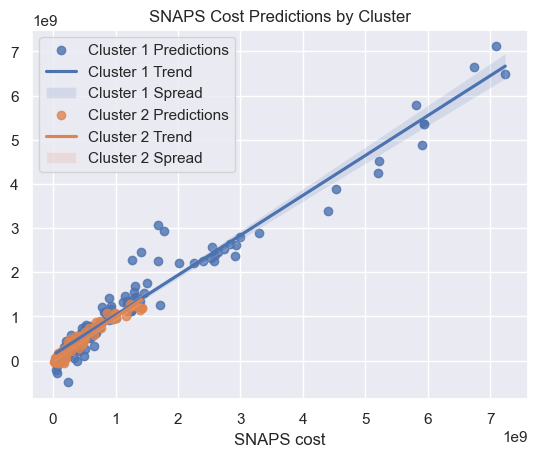

In [32]:
count = 1
sns.set()
for df_arr in df_by_cluster:
    print(f"CLUSTER {count} --------------------------------------------")
    print(f"Contains: \n{clusters[count - 1]}")
    x = df_arr[0]
    y = df_arr[1]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)

    sns.regplot(x=y_test,y=predictions).set(title="SNAPS Cost Predictions by Cluster")
    plt.legend(labels=["Cluster 1 Predictions", "Cluster 1 Trend", "Cluster 1 Spread", "Cluster 2 Predictions", "Cluster 2 Trend", "Cluster 2 Spread"])
    
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    
    cluster_models.append(model)
    cluster_parameters.append([X_train, X_test, y_train, y_test])
    cluster_predictions.append(predictions)
    cluster_ls.append(ls)

[Text(0.5, 1.0, 'Cluster 1 SNAPS predictions')]

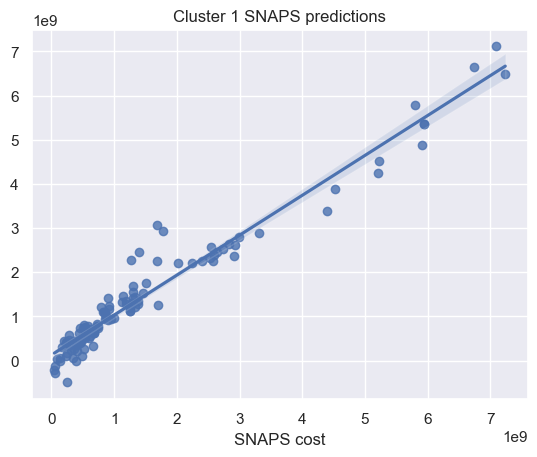

In [33]:
sns.regplot(x=cluster_parameters[0][3],y=cluster_predictions[0]).set(title="Cluster 1 SNAPS predictions")

[Text(0.5, 1.0, 'Cluster 2 SNAPS predictions')]

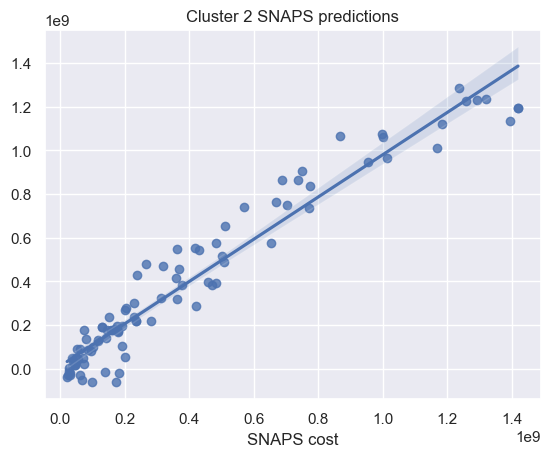

In [34]:
sns.regplot(x=cluster_parameters[1][3],y=cluster_predictions[1]).set(title="Cluster 2 SNAPS predictions")